In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

In [2]:
ratings = pd.read_csv('./ratings.csv')
movies = pd.read_csv('./movies.csv')
tags = pd.read_csv('./tags.csv')

In [3]:
tags.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [4]:
ratings.shape

(100836, 4)

In [5]:
ratings.userId.unique().shape

(610,)

In [6]:
ratings.movieId.unique().shape

(9724,)

In [7]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [8]:
ratings.merge(movies)[['userId', 'title', 'rating']]

,userId,title,rating
0,1,Toy Story (1995),4.0
1,5,Toy Story (1995),4.0
2,7,Toy Story (1995),4.5
3,15,Toy Story (1995),2.5
4,17,Toy Story (1995),4.5
...,...,...,...
100831,610,Bloodmoon (1997),2.5
100832,610,Sympathy for the Underdog (1971),4.5
100833,610,Hazard (2005),3.0
100834,610,Blair Witch (2016),3.5


In [9]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


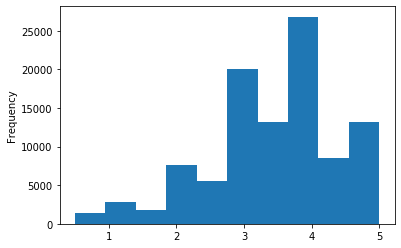

In [10]:
ratings.rating.plot.hist(bins=10)

In [11]:
ratings.groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [12]:
movies[movies['movieId'] == 344]

,movieId,title,genres
302,344,Ace Ventura: Pet Detective (1994),Comedy


In [13]:
ratings[ratings['movieId'] == 356].mean()

userId       3.081611e+02
movieId      3.560000e+02
rating       4.164134e+00
timestamp    1.173755e+09
dtype: float64

In [14]:
ratings.groupby('movieId')['rating'].agg(['count','mean']).reset_index().sort_values(by=['count', 'mean'], ascending=False)

,movieId,count,mean
314,356,329,4.164134
277,318,317,4.429022
257,296,307,4.197068
510,593,279,4.161290
1938,2571,278,4.192446
...,...,...,...
9401,165645,1,0.500000
9426,167296,1,0.500000
9540,173307,1,0.500000
9572,175475,1,0.500000


In [15]:
ratings[(ratings['rating'] < 3)].groupby('movieId')['rating'].agg(['count']).sort_values(by='count', ascending=False)

,count
movieId,
344,49
231,45
2628,43
19,42
153,41
...,...
6946,1
6967,1
6973,1


In [16]:
ratings[(ratings['movieId'] == 318) & (ratings['rating'] >= 4)]

,userId,movieId,rating,timestamp
703,6,318,5.0,845553200
1051,8,318,5.0,839463489
1271,11,318,4.0,902155070
1443,15,318,5.0,1510571866
1576,16,318,4.0,1377476766
...,...,...,...,...
95867,601,318,5.0,1441639169
96033,602,318,5.0,840875594
98498,607,318,5.0,963080679
98727,608,318,4.5,1147210910


In [17]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [18]:
ratings.groupby('userId')['rating'].count().mean()

165.30491803278687

In [19]:
ratings.groupby('userId')['rating'].count().sort_values(ascending=False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
569      20
194      20
147      20
406      20
442      20
Name: rating, Length: 610, dtype: int64

In [25]:
movies[movies.title.str.contains("Les")]

,movieId,title,genres
65,73,"Misérables, Les (1995)",Drama|War
168,199,"Umbrellas of Cherbourg, The (Parapluies de Che...",Drama|Musical|Romance
460,526,"Savage Nights (Nuits fauves, Les) (1992)",Drama
583,718,"Visitors, The (Visiteurs, Les) (1993)",Comedy|Fantasy|Sci-Fi
653,841,"Eyes Without a Face (Yeux sans visage, Les) (1...",Horror
678,896,Wild Reeds (Les roseaux sauvages) (1994),Drama
870,1151,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy
1090,1415,"Thieves (Voleurs, Les) (1996)",Crime|Drama|Romance
1247,1658,"Life Less Ordinary, A (1997)",Romance|Thriller
1369,1873,"Misérables, Les (1998)",Crime|Drama|Romance|War


In [65]:
movies[movies.title.str.lower().str.contains('terminator')]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi
939,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller
4425,6537,Terminator 3: Rise of the Machines (2003),Action|Adventure|Sci-Fi
7030,68791,Terminator Salvation (2009),Action|Adventure|Sci-Fi|Thriller
8654,120799,Terminator Genisys (2015),Action|Adventure|Sci-Fi|Thriller


In [42]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [50]:
genres = []
movies.genres.str.split("|").str.join(" ").apply(lambda x: [genres.append(genre) for genre in x])

0       [None, None, None, None, None]
1                   [None, None, None]
2                         [None, None]
3                   [None, None, None]
4                               [None]
                     ...              
9737          [None, None, None, None]
9738                [None, None, None]
9739                            [None]
9740                      [None, None]
9741                            [None]
Name: genres, Length: 9742, dtype: object

In [56]:
", ".join(list(sorted(set(genres))))

'(no genres listed), Action, Adventure, Animation, Children, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, IMAX, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western'

In [59]:
movies.head(5)[['title', 'genres']]

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf_matrix = tf.fit_transform(movies.genres.str.split("|").str.join(" "))
tfidf_matrix.shape

(9742, 23)

In [63]:
tf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [64]:
tf.vocabulary_

{'adventure': 1,
 'animation': 2,
 'children': 3,
 'comedy': 4,
 'fantasy': 8,
 'romance': 18,
 'drama': 7,
 'action': 0,
 'crime': 5,
 'thriller': 20,
 'horror': 12,
 'mystery': 16,
 'sci': 19,
 'fi': 9,
 'war': 21,
 'musical': 15,
 'documentary': 6,
 'imax': 13,
 'western': 22,
 'film': 10,
 'noir': 17,
 'genres': 11,
 'listed': 14}